# Data Science and Business Analytics Internship @THE SPARKS FOUNDATION: GRIP August 2021

## Task 1: Predicting percentage score of a student based on number of study hours using                       Supervised Machine Learning

### BY: ANABELI CHANDRA, St. Xavier's College (Autonomous), Kolkata

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing data into the dataframe from the csv file
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df #displaying the dataframe

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
#checking data fpr potential missing values
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


## Data Visualization (Library used: Matplotlib)

Text(0.5, 1.0, 'No of Hours vs Score')

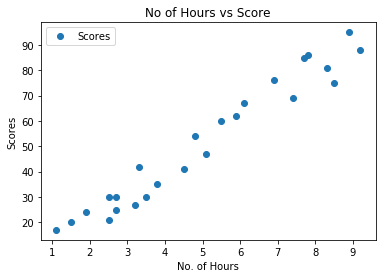

In [6]:
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel('No. of Hours')
plt.ylabel('Scores')
plt.title('No of Hours vs Score')

From the scatter plot, it can safely be assumed that there exists a linear relationship between the number of hours studied by a student and his/her respective scores.

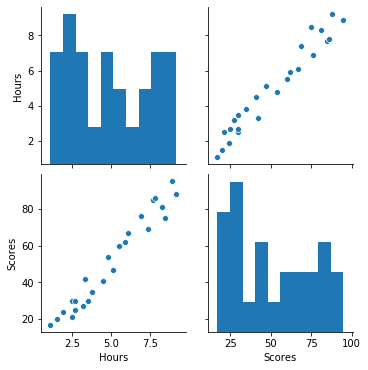

In [7]:
sns.pairplot(df)

## Data Pre-processing

In [8]:
X=df['Hours'] #independent variable
Y=df['Scores'] #target variable
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [9]:
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [12]:
X_train.head()

1     5.1
14    1.1
18    6.1
0     2.5
12    4.5
Name: Hours, dtype: float64

In [13]:
y_train.head()

1     47
14    17
18    67
0     21
12    41
Name: Scores, dtype: int64

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17,)
(17,)
(8,)
(8,)


In [15]:
d1=pd.DataFrame(X_train)
d2=d1.values.reshape(-1,1)
X_train=pd.DataFrame(d2)
X_train

,0
0,5.1
1,1.1
2,6.1
3,2.5
4,4.5
5,1.5
6,6.9
7,2.7
8,3.5
9,8.3


In [16]:
d1=pd.DataFrame(X_test)
d2=d1.values.reshape(-1,1)
X_test=pd.DataFrame(d2)
X_test

,0
0,2.5
1,7.7
2,3.8
3,7.4
4,5.5
5,4.8
6,3.2
7,8.5


In [17]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      0
0   5.1
1   1.1
2   6.1
3   2.5
4   4.5
5   1.5
6   6.9
7   2.7
8   3.5
9   8.3
10  3.3
11  2.7
12  8.9
13  7.8
14  9.2
15  1.9
16  5.9
1     47
14    17
18    67
0     21
12    41
5     20
23    76
20    30
4     30
8     81
13    42
9     25
15    95
24    86
6     88
17    24
11    62
Name: Scores, dtype: int64
     0
0  2.5
1  7.7
2  3.8
3  7.4
4  5.5
5  4.8
6  3.2
7  8.5
16    30
10    85
22    35
19    69
7     60
21    54
2     27
3     75
Name: Scores, dtype: int64


In [18]:
from sklearn.linear_model import LinearRegression

## Model Training

In [19]:
lm=LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


## Prediction using linear regression 

In [22]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

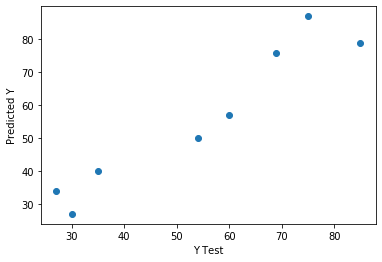

In [23]:
#scatter plot b/w predicted value and test labels
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [24]:
pred_values=pd.DataFrame({'Test labels':y_test,'Predicted value':predictions})
pred_values

,Test labels,Predicted value
16,30,27.018782
10,85,78.844662
22,35,39.975252
19,69,75.854708
7,60,56.918328
21,54,49.941767
2,27,33.995343
3,75,86.817875


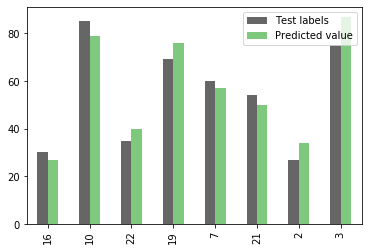

In [25]:
pred_values.plot(kind='bar',colormap='Accent_r')

## Model Evaluation

Model evaluation done using metrics such as Mean Absolute Error,Mean squared error, Root mean squared error

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


## Q. Predict score if a student studies 9.5 hours a day.

In [27]:
hrs=[[9.25]]
p_score=lm.predict(hrs)
print("A student studying 9.25 hrs a day might score around",p_score[0],'marks.')

A student studying 9.25 hrs a day might score around 94.29276125536512 marks.


## A student who studies 9.25 hours a day is likely to score 94.3 (approx) marks.